# Building a Logistic Regression Classification Model

In [1]:
#import requried lib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
#Load the dataset
data = pd.read_csv('diabetes_na.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             767 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [7]:
data.descrive().T

AttributeError: 'DataFrame' object has no attribute 'descrive'

# Checking the Missing Values

In [8]:
data.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [98]:
df=data.fillna(method='bfill')
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age 

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,8.0,85,66,29.0,0,26.6,0.351,32.0,0
2,8.0,183,64,0.0,0,28.1,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

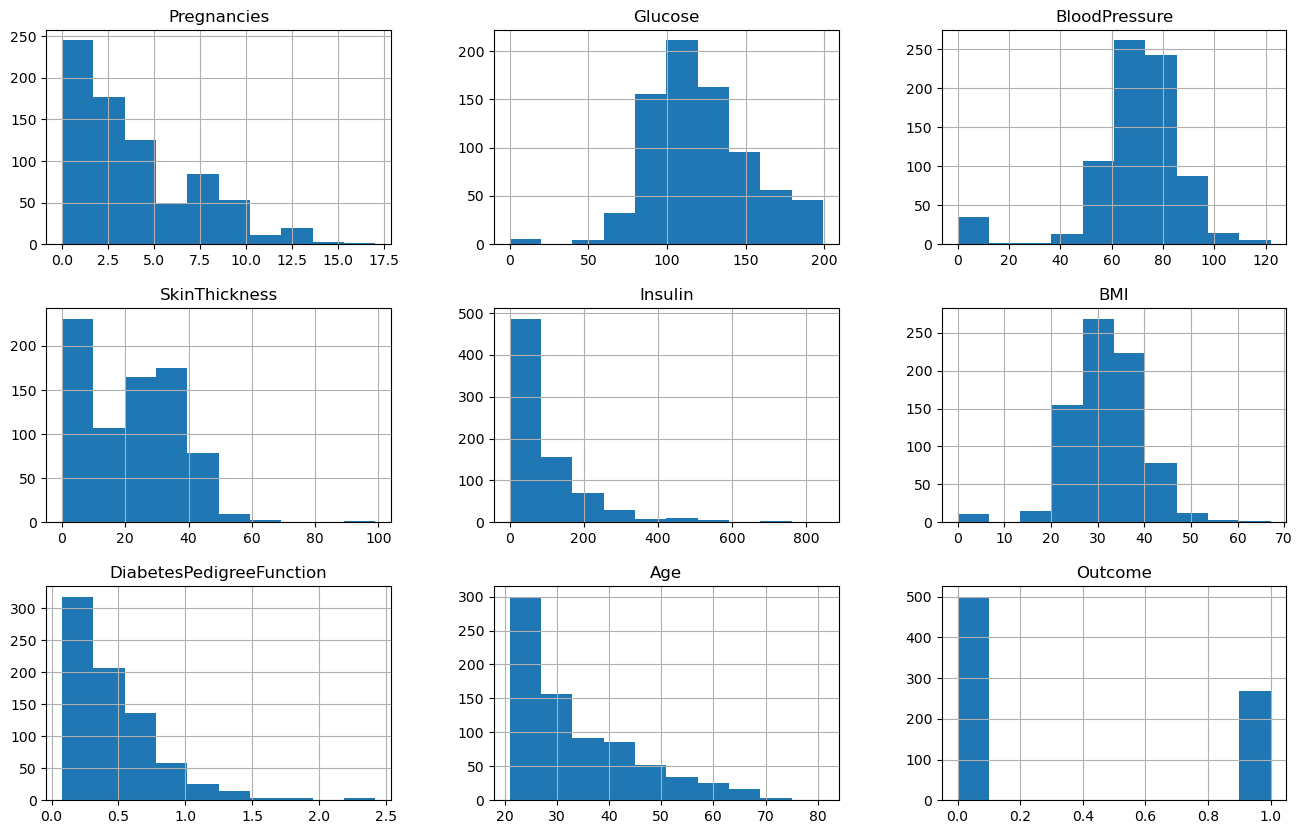

In [13]:
df.hist(figsize=(16,10))

<Axes: >

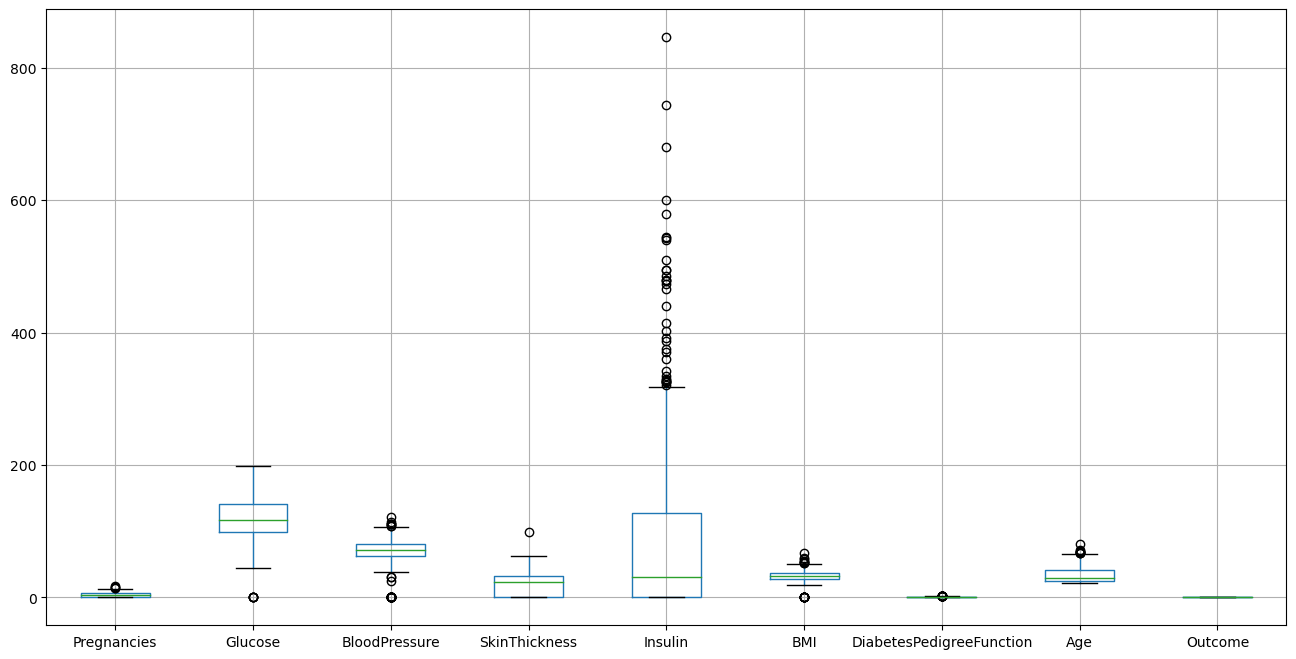

In [16]:

df.boxplot(figsize=(16,8))

<Axes: >

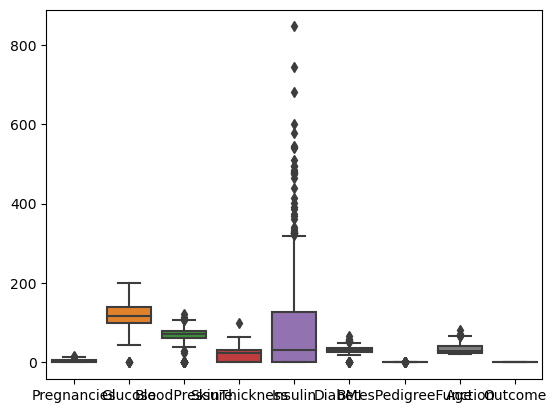

In [17]:
sns.boxplot(df)

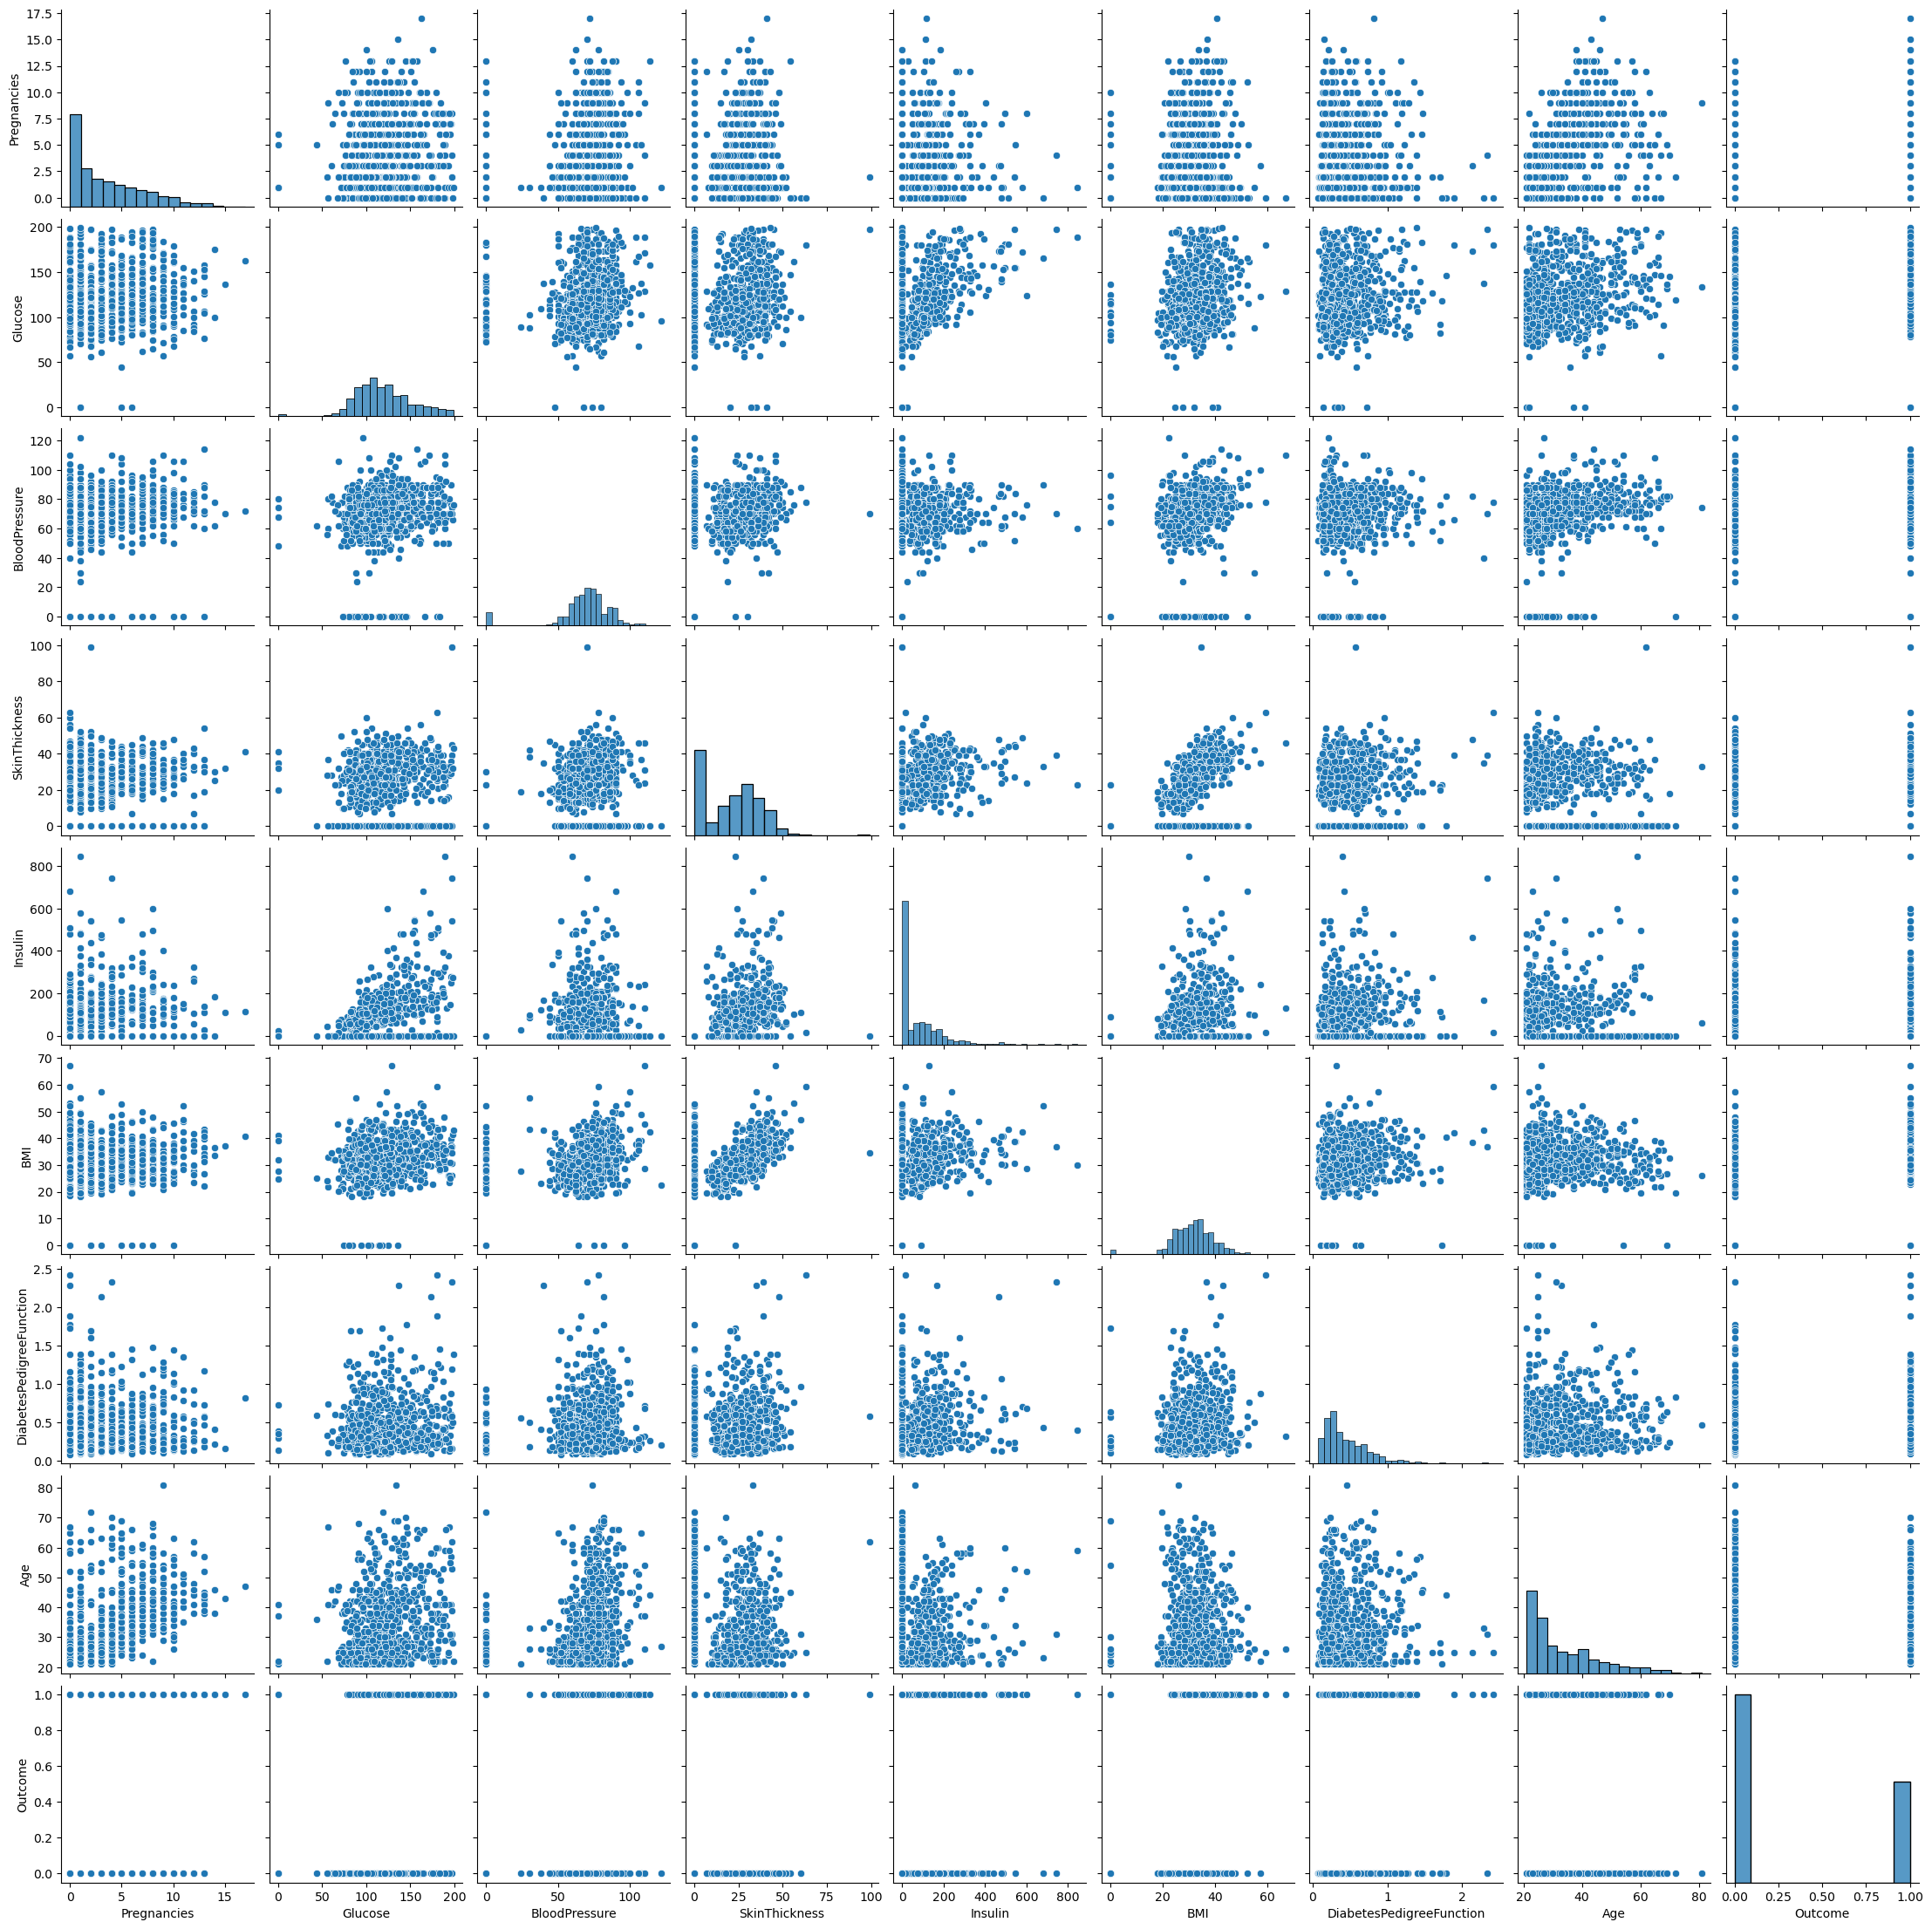

In [18]:
sns.pairplot(df)

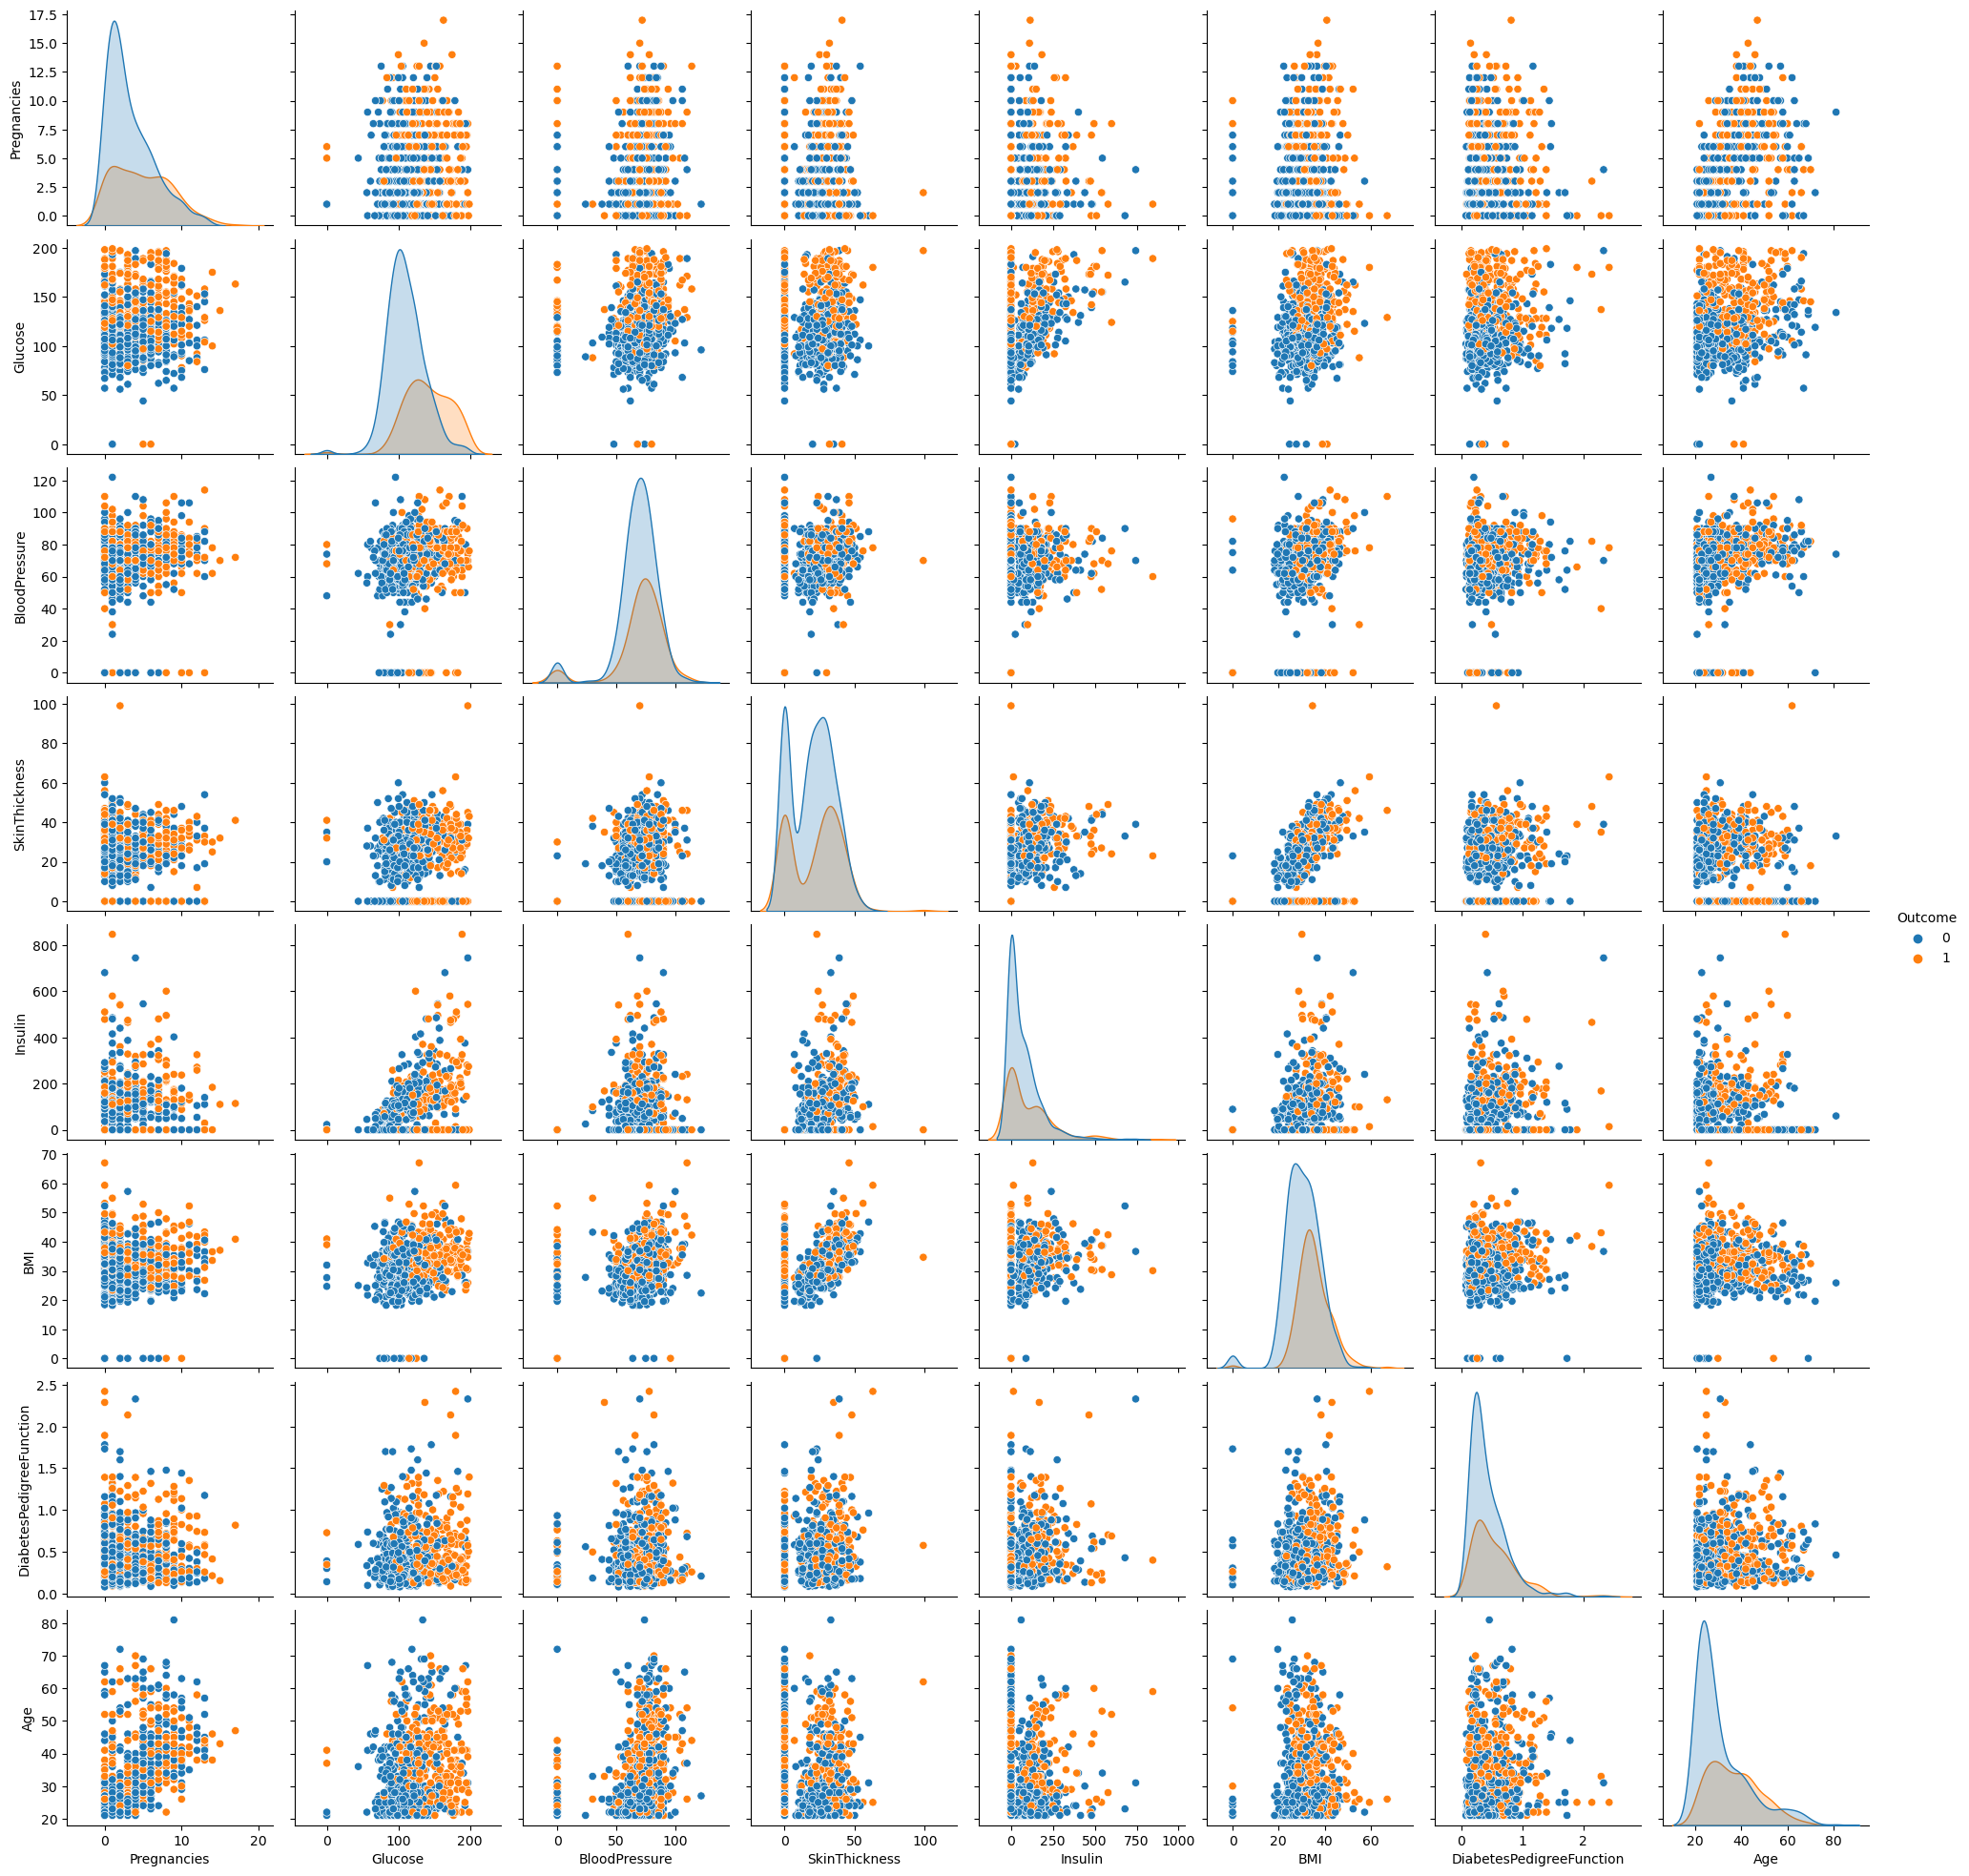

In [19]:
sns.pairplot(df,hue='Outcome')

# Assign the x-axis and y-axis

In [37]:
x=df.iloc[:,:-1]
y = df.iloc[:,-1:]
print(x.head(2))
print(y.head(2))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148             72           35.0        0  33.6   
1          8.0       85             66           29.0        0  26.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  32.0  
   Outcome
0        1
1        0


In [38]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35.0,0,33.6,0.627,50.0
1,8.0,85,66,29.0,0,26.6,0.351,32.0


In [39]:
y.head(2)

,Outcome
0,1
1,0


<Axes: ylabel='count'>

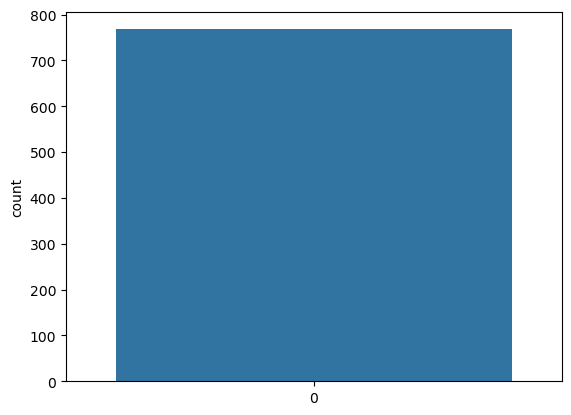

In [40]:
sns.countplot(df['Outcome'])

# split the data for Training and Testing

In [41]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.25, random_state=2)

print('Training data for x-axis Shape:\t',xtrain.shape)
print()
print('Training data for y-axis shape:\t',ytrain.shape)
print()
print('***************Testing data Shape*********************\n')
print()
print('Testing data Shape\t',xtest.shape)
print()
print('Testing data Shape\t',xtrain.shape)

Training data for x-axis Shape:	 (576, 8)

Training data for y-axis shape:	 (576, 1)

***************Testing data Shape*********************


Testing data Shape	 (192, 8)

Testing data Shape	 (576, 8)


# Model Development with Logistic Regression Algo

In [63]:
#invoke the log reg algo from sklearn
log_reg=LogisticRegression(solver='liblinear')

#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)

#Test the model

ypred= log_reg.predict(xtest)
print('Predicted Lable for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing Samples are : \t',len(ypred))

Training the model

Predicted Lable for the input samples:
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0]

Testing is completed

Testing Samples are : 	 192


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance Measures

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



print('*************Performance measures for Logstic regression*************')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('Confussinon matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classificatino report: \n',classification_report(ytest,ypred))

*************Performance measures for Logstic regression*************
Accuracy Score:	
 0.7604166666666666

Confussinon matrix:
 [[121  13]
 [ 33  25]]

Classificatino report: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       134
           1       0.66      0.43      0.52        58

    accuracy                           0.76       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.75      0.76      0.74       192



In [65]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Hyperparameter tuning

In [66]:
log_reg.class_weight()

TypeError: 'NoneType' object is not callable

In [67]:
log_reg.classes_

array([0, 1], dtype=int64)

In [68]:
log_reg.coef_

array([[ 0.16880811,  0.02937135, -0.01773145,  0.00336619, -0.00081633,
         0.0514995 ,  0.715534  , -0.00466066]])

In [69]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear')>

In [70]:
log_reg.dual

False

In [71]:
log_reg.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [72]:
log_reg.fit_intercept

True

In [73]:
log_reg.intercept_

array([-5.51571048])

In [74]:
log_reg.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [75]:
log_reg.predict_log_probae(xtest)

AttributeError: 'LogisticRegression' object has no attribute 'predict_log_probae'

# ROC curve

In [76]:
y_probs=log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.08866522, 0.20435858, 0.11851859, 0.20294092, 0.45907642,
       0.17105769, 0.11084799, 0.42839368, 0.10476779, 0.54997449,
       0.4138107 , 0.46049792, 0.7054914 , 0.20449237, 0.05026097,
       0.78688753, 0.79831468, 0.07028641, 0.33818831, 0.80800738,
       0.91464034, 0.79013158, 0.17503598, 0.32744759, 0.14755621,
       0.11410799, 0.54291248, 0.37265134, 0.19656906, 0.31019846,
       0.24430981, 0.43058578, 0.06675678, 0.27557248, 0.40641509,
       0.9200716 , 0.35746867, 0.75684716, 0.31756236, 0.11258514,
       0.25101752, 0.1009352 , 0.58546362, 0.22503329, 0.05905463,
       0.08312015, 0.27409398, 0.43344043, 0.12994607, 0.44022003,
       0.96313272, 0.09594847, 0.32136478, 0.73733006, 0.37600542,
       0.47334514, 0.88165521, 0.38264966, 0.2580877 , 0.09171063,
       0.40420982, 0.81081807, 0.79040269, 0.8408945 , 0.32465101,
       0.11975108, 0.9366833 , 0.3496819 , 0.32312925, 0.34307948,
       0.14510841, 0.11635831, 0.47319775, 0.12563098, 0.13923

In [77]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

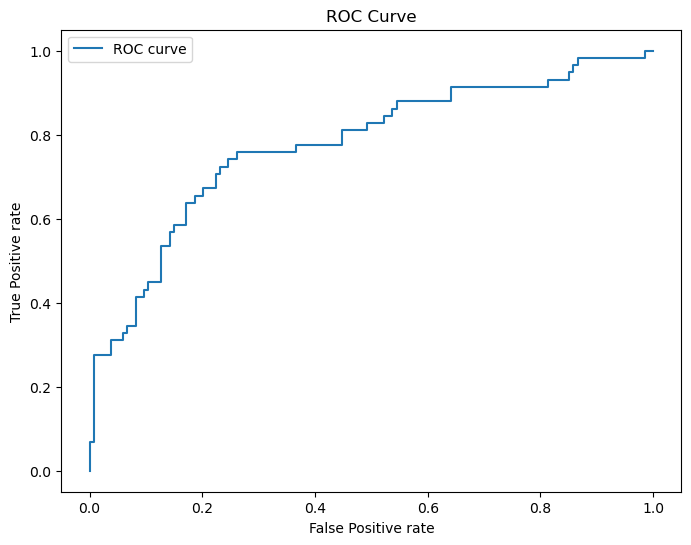

In [82]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
#Cslculate ROC and Auc 
fpr,tpr,thresholds=roc_curve(ytest,y_probs)
roc_curve= auc(fpr,tpr)


#Plot Roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [83]:
roc_curve

0.7759907359752959

In [88]:
cm=confusion_matrix(ytest,ypred)
cm

array([[121,  13],
       [ 33,  25]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

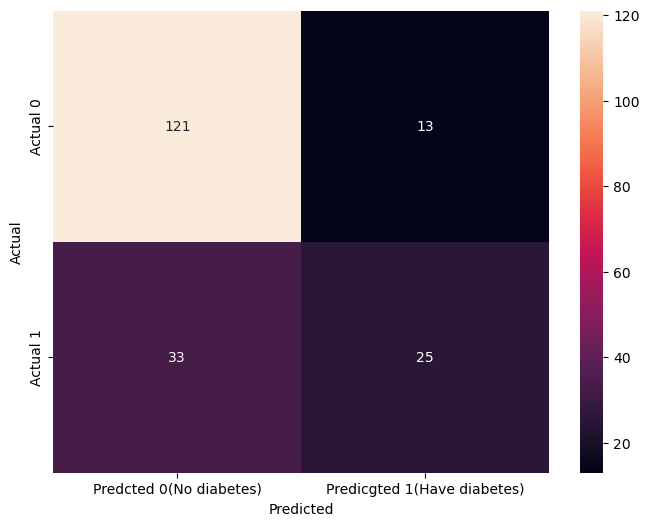

In [92]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['Predcted 0(No diabetes)','Predicgted 1(Have diabetes)'], yticklabels=["Actual 0",'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [94]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64